# **Image Compression Using Singular Value Decomposition (SVD)**

### **Objective**
This project explores how Singular Value Decomposition (SVD) can be used for image compression. By reconstructing images using only the most significant singular values, we achieve a balance between storage efficiency and visual quality.

---

### **Key Steps**:
1. Load and preprocess an image (grayscale or color).
2. Decompose the image using SVD.
3. Reconstruct the image with fewer singular values (`r`).
4. Visualize the trade-off between compression and image quality.


In [1]:
# Import necessary libraries
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

# Set global figure size for plots
plt.rcParams['figure.figsize'] = (10, 6)


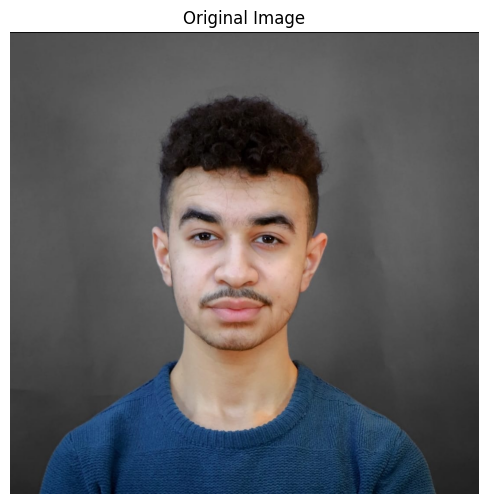

In [8]:
# Load the image (replace 'mypic.jpeg' with your image file name)
image_path = 'test_pic.jpeg'  # Ensure this file is in the same directory as your notebook
A = imread(image_path)

# Display the original image
plt.figure()
plt.imshow(A)
plt.title('Original Image')
plt.axis('off')
plt.show()


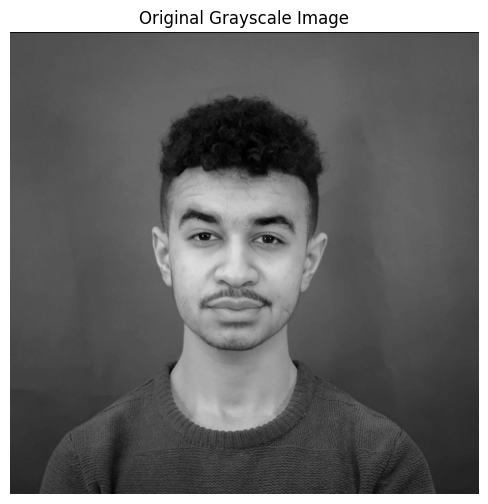

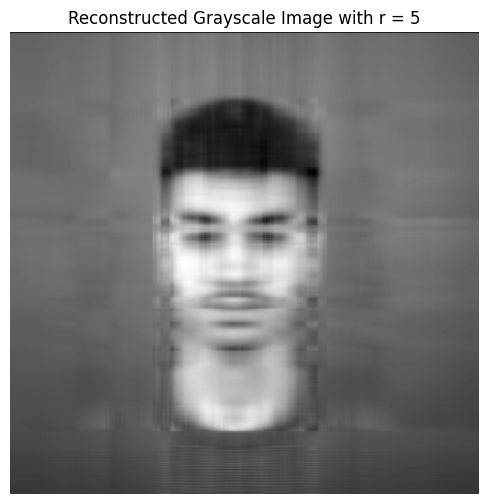

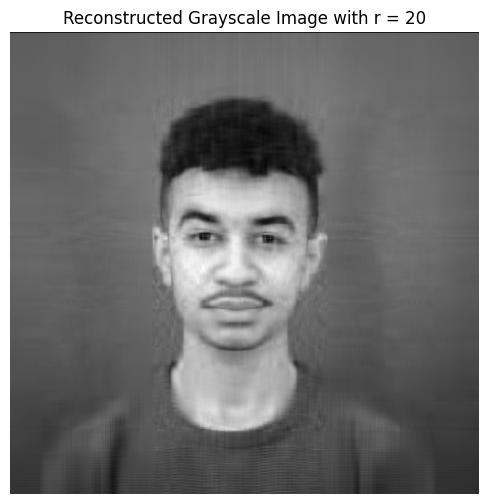

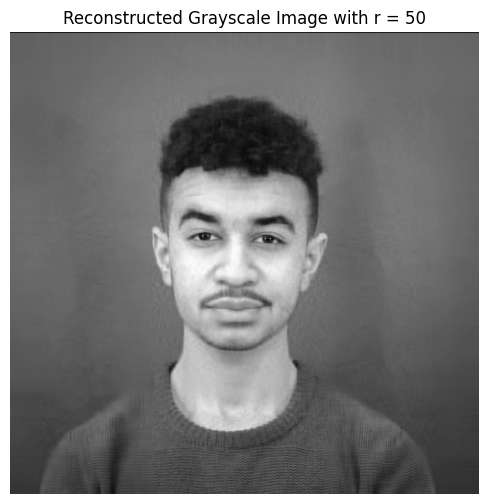

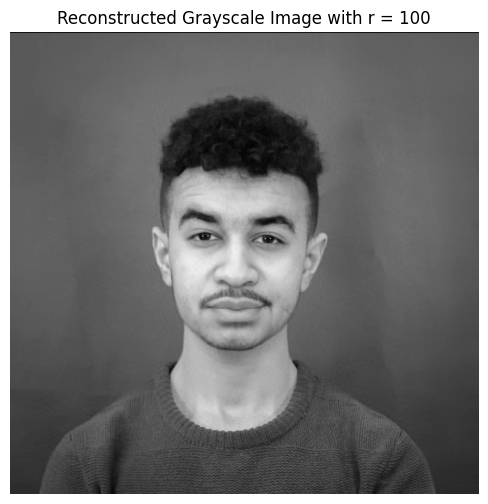

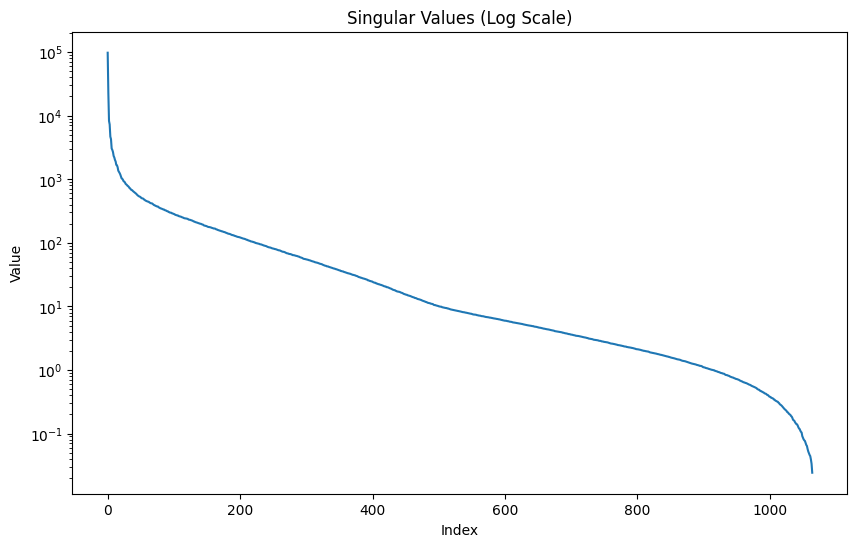

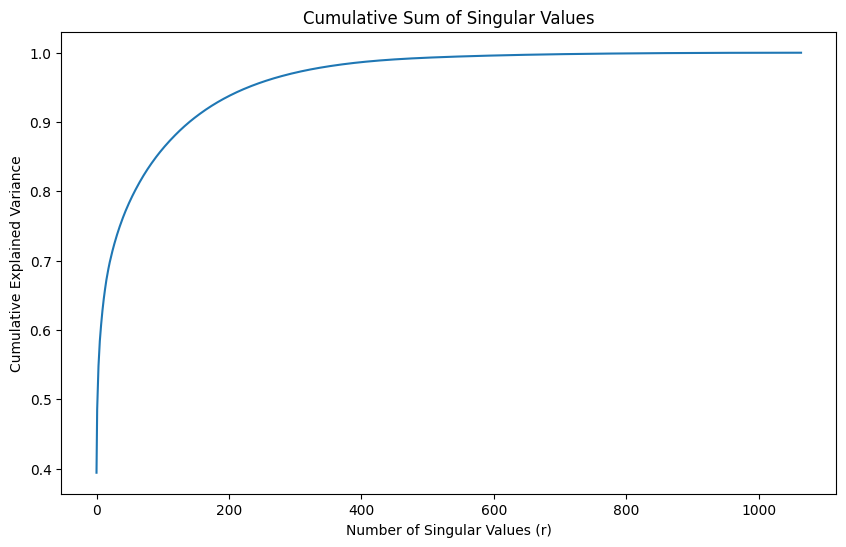

In [9]:
# Convert the image to grayscale
X = np.mean(A, axis=-1)  # Average RGB values to get grayscale

# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

# Display the original grayscale image
plt.figure()
plt.imshow(X, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

# Reconstruct the image with different numbers of singular values
for r in [5, 20, 50, 100]:
    Xapprox = U[:, :r] @ S[:r, :r] @ VT[:r, :]
    plt.figure()
    plt.imshow(Xapprox, cmap='gray')
    plt.title(f'Reconstructed Grayscale Image with r = {r}')
    plt.axis('off')
    plt.show()

# Plot singular values and cumulative explained variance
plt.figure()
plt.semilogy(np.diag(S))
plt.title('Singular Values (Log Scale)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

plt.figure()
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))
plt.title('Cumulative Sum of Singular Values')
plt.xlabel('Number of Singular Values (r)')
plt.ylabel('Cumulative Explained Variance')
plt.show()

## **Grayscale Image Compression**

- **SVD Explanation**:
  - The image is decomposed into three matrices: `U`, `S`, and `VT`.
  - The diagonal matrix `S` contains singular values, representing the importance of features.
  - By keeping only the top `r` singular values, we approximate the original image.

- **Observations**:
  - As `r` increases, the reconstructed image quality improves.
  - The singular values decay rapidly, meaning a small number of singular values can retain most of the image's information.

- **Trade-Off**:
  - Lower `r`: High compression, low quality.
  - Higher `r`: Low compression, high quality.


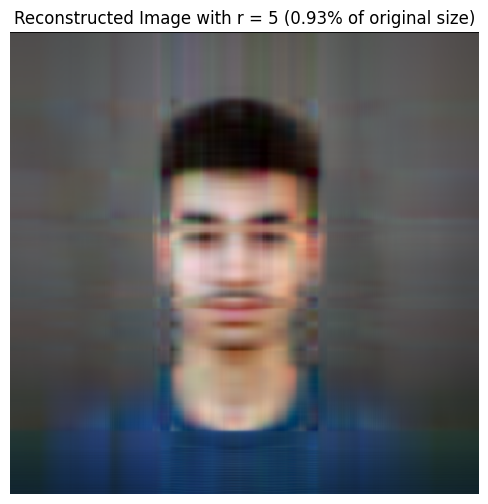

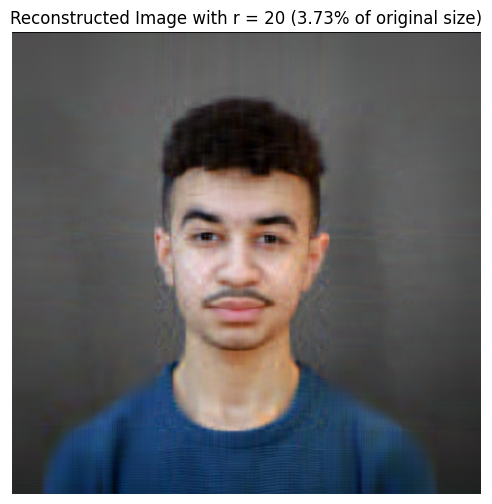

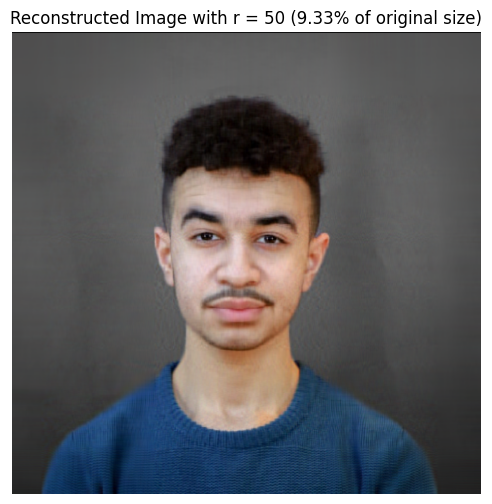

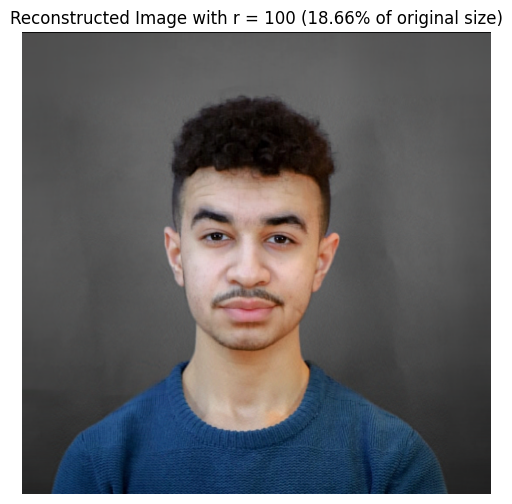

In [10]:
def svd_color_image(image_path, r):
    # Load the image
    A = imread(image_path)

    # Dimensions of the original image
    original_size = A.shape[0] * A.shape[1] * 3  # Total pixels across RGB channels

    # Perform SVD on each color channel
    U_r, S_r, VT_r = np.linalg.svd(A[:, :, 0], full_matrices=False)
    U_g, S_g, VT_g = np.linalg.svd(A[:, :, 1], full_matrices=False)
    U_b, S_b, VT_b = np.linalg.svd(A[:, :, 2], full_matrices=False)

    # Calculate the size of the reconstructed image
    # Retain only the first r singular values and associated vectors
    compressed_size = (
        r * (A.shape[0] + A.shape[1] + 1) * 3  # Size of U, S, and VT for R, G, B
    )
    compression_ratio = (compressed_size / original_size) * 100

    # Keep only the top r singular values
    R_approx = U_r[:, :r] @ np.diag(S_r[:r]) @ VT_r[:r, :]
    G_approx = U_g[:, :r] @ np.diag(S_g[:r]) @ VT_g[:r, :]
    B_approx = U_b[:, :r] @ np.diag(S_b[:r]) @ VT_b[:r, :]

    # Combine the approximated channels
    Xapprox = np.stack([R_approx, G_approx, B_approx], axis=-1)
    Xapprox = np.clip(Xapprox, 0, 255).astype(np.uint8)

    # Display the reconstructed image with compression ratio in the title
    plt.figure()
    plt.imshow(Xapprox)
    plt.title(f'Reconstructed Image with r = {r} ({compression_ratio:.2f}% of original size)')
    plt.axis('off')
    plt.show()

# Test the function with different values of r
svd_color_image(image_path, 5)
svd_color_image(image_path, 20)
svd_color_image(image_path, 50)
svd_color_image(image_path, 100)


## **Color Image Compression**

- **Process**:
  - Each color channel (Red, Green, Blue) is independently decomposed using SVD.
  - The reconstructed channels are stacked together to form the final image.

- **Observations**:
  - Even with low `r`, the compressed image retains its structure and colors.
  - Higher `r` values improve image quality but increase storage requirements.

- **Applications**:
  - Image compression for storage or transmission.
  - Dimensionality reduction for faster image processing tasks.


## **Conclusions**

1. **Grayscale Compression**:
   - A small number of singular values can retain most of the image information.
   - Singular values decay rapidly, meaning the first few singular values are the most important.

2. **Color Compression**:
   - SVD works effectively for compressing color images by applying it to each channel independently.
   - High-quality approximations are possible with relatively low `r` values.

3. **General Insights**:
   - SVD-based compression provides a flexible trade-off between quality and storage.
   - Singular values give insights into how much information each component contributes.

---

## **Future Work**
- Apply this method to a large dataset of images.
- Compare SVD-based compression with standard compression methods like JPEG.
- Use SVD for tasks like image denoising or feature extraction.


## **Credits**
- Data provided by Yann Chevaleyre.
- Analysis and implementation by Mohamed ZOUAD & Mohamed El Amine ROUIBI.
